In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [0]:
def display_images(images):
    fig=plt.figure(figsize=(20,10))
    for i in range(len(images)):
        fig.add_subplot(1,len(images),i+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.show()

In [0]:
def display_image(images):
  plt.axis('off')
  plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
  plt.show()

In [0]:
def get_frames(video) :

  frames = []
  cap = cv2.VideoCapture(video)

  while(True):
      # Capture frame-by-frame
      ret, frame = cap.read()  # ret = 1 if the video is captured; frame is the image
      if ret == 1 :
        frames.append(frame)
      else :
        break

  return frames

In [0]:
#fonction qui calcul l'histograme selon chaque channel (rgb)
def hist(img, histSize = 256, histRange = (0, 256), accumulate = False):
  bgr_planes = cv2.split(img)
  b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate = accumulate)
  g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate = accumulate)
  r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate = accumulate)
  return np.array([b_hist, g_hist, r_hist])

def dist(histo1, histo2):
  return 1 - np.sum(np.minimum(histo1, histo2))/np.minimum(np.sum(histo1), np.sum(histo2))


In [0]:
# fonction d'échantillonnage, elle prend 8 frames aleatoire du video

def get_echant_video(frames):
  list=[]
  echan_frames=[]
  for i in range(8):
    r=random.randint(1,len(frames))
    if r not in list:
      list.append(r)
      echan_frames.append(frames[r])
    else: i = i-1

  return (echan_frames)


In [0]:
video_ref = "Megamind.avi"
video_com = "Megamind_bugy.avi"


In [0]:
ref_frames = get_frames(video_ref)
frames = get_frames(video_com)


Video de Ref :


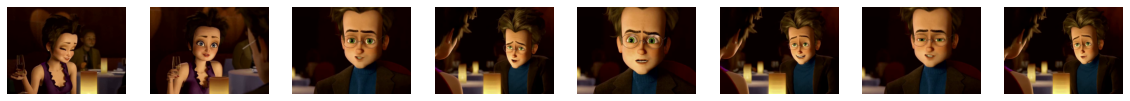

Video de comparaison 1 :


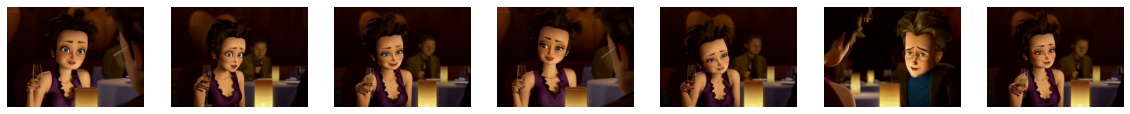

In [148]:
echan_ref = get_echant_video(ref_frames)
print("Video de Ref :")
display_images(echan_ref)
echan_com = get_echant_video(frames)
print("Video de comparaison 1 :")
display_images(echan_com)

In [0]:
def calc_taux_simul(vid1,vid2,det=False):
  simul = 0
  op = 0
  for i in vid1 :
    for j in vid2 :
      distance = dist(hist(i),hist(j))
      op += 1
      if distance<0.35 :
        simul += 1
  if (det) :
    print("le taux de simultarité: "+str((simul/op)*100)+"%")
    if simul/op>0.5 :
      print("les 2 videos sont similaire")
    else :
      print("les 2 videos ne sont pas similaire")
  return(simul/op)


In [147]:
taux1 = calc_taux_simul(echan_ref,echan_com,True)


le taux de simultarité: 100.0%
les 2 videos sont similaire


In [0]:
def plan_detect(frames,det=False) :

  histo = []
  vid_dist = []
  new_scene = []

  for i in frames :
    histo.append(hist(i))

  for i in range (len(histo)-1) :
    dista = dist(histo[i],histo[i+1])
    vid_dist.append(dista)
    if dista>0.15:
      new_scene.append(frames[i+1])

  if det :

    x = np.linspace(0, len(vid_dist), len(vid_dist))
    plt.plot(x,vid_dist)
    plt.title("l’histogramme d’intensité")
    plt.xlabel("frames")
    plt.ylabel("Distance des histo")
    plt.show()

    print("Les plans detectés :")
    display_images(new_scene)


  return(new_scene)


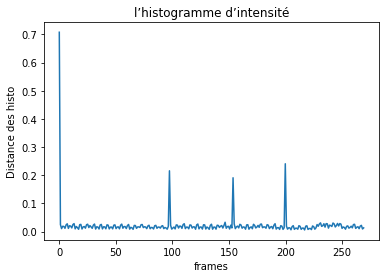

Les plans detectés :


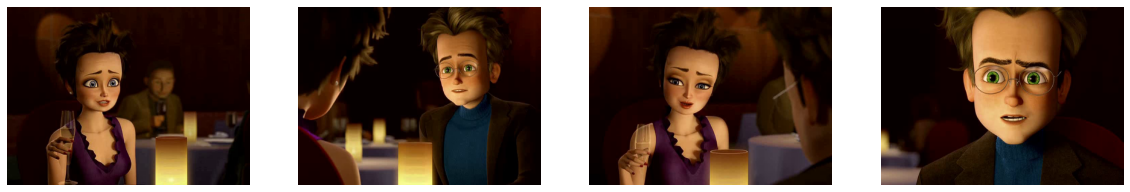

In [140]:
resume_ref = plan_detect(ref_frames,True)


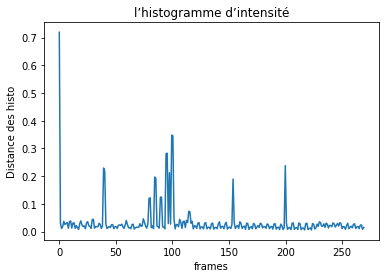

Les plans detectés :


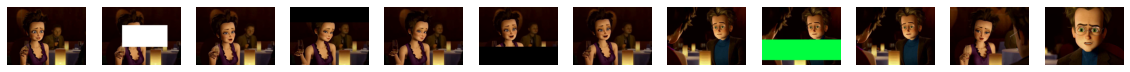

In [141]:
resume_vid1 = plan_detect(frames,True)

In [146]:
taux1 = calc_taux_simul(resume_ref,resume_vid1,True)


le taux de simultarité: 87.5%
les 2 videos sont similaire
